1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

*а), б), г) - если в б) и г) есть временная шкала. Формально д) и е) - тоже могут быть временными рядами, если снимать координаты через равные промежутки времени*

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data = data.sort_index()

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

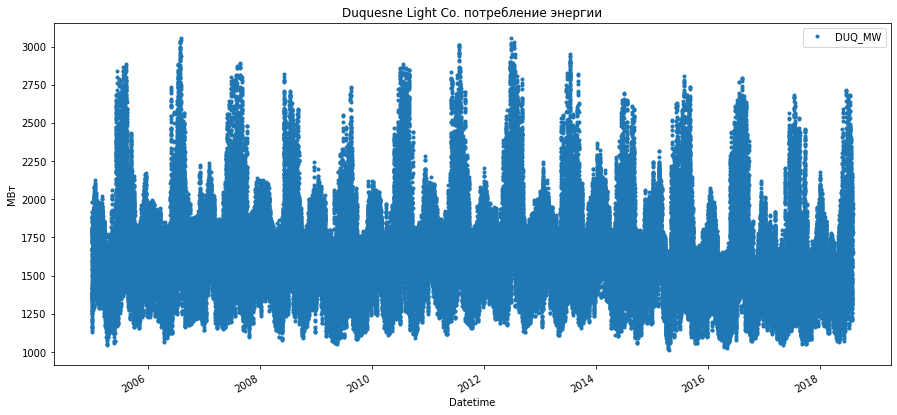

In [7]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Duquesne Light Co. потребление энергии' )
plt.ylabel ( 'МВт' )

In [8]:
data['date'] = data.index
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [9]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

В целом выборка повторяет структуру рассмотренной на уроке аналогичной выборки, присутствуют те же задвоения дат с переводом времени, но отсутвует выброс октября 2012 года, связанный с ураганом Сэнди.

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [10]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [33]:
# строим таблицу средних значений по неделям
brent_data_week_mean = brent_data.resample("W").mean()
brent_data_week_std = brent_data.resample("W").std()
brent_data_week = pd.concat([brent_data_week_mean['Значение'], brent_data_week_std['Значение']], axis=1, keys=['Среднее значение', 'Среднее отклонение'])
brent_data_week.sort_index()
brent_data_week.head()

,Среднее значение,Среднее отклонение
Дата,,
2010-09-05,76.616000,0.185688
2010-09-12,77.673333,0.649759
2010-09-19,78.693333,0.539728
2010-09-26,78.518333,0.596068
2010-10-03,81.211667,2.408588


In [34]:
# строим таблицу средних значений по месяцам
brent_data_month_mean = brent_data.resample("M").mean()
brent_data_month_std = brent_data.resample("M").std()
brent_data_month = pd.concat([brent_data_month_mean['Значение'], brent_data_month_std['Значение']], axis=1, keys=['Среднее значение', 'Среднее отклонение'])
brent_data_month.sort_index()
brent_data_month.head()

,Среднее значение,Среднее отклонение
Дата,,
2010-09-30,78.228148,1.294269
2010-10-31,83.473462,0.898559
2010-11-30,86.178077,1.753625
2010-12-31,92.232308,1.443311
2011-01-31,97.033200,1.842147


In [35]:
# строим таблицу средних значений по годам
brent_data_year_mean = brent_data.resample("Y").mean()
brent_data_year_std = brent_data.resample("Y").std()
brent_data_year = pd.concat([brent_data_year_mean['Значение'], brent_data_year_std['Значение']], axis=1, keys=['Среднее значение', 'Среднее отклонение'])
brent_data_year.sort_index()
brent_data_year.head()

,Среднее значение,Среднее отклонение
Дата,,
2010-12-31,84.963238,5.269065
2011-12-31,110.758746,7.021114
2012-12-31,111.377484,7.777702
2013-12-31,108.137114,4.014836
2014-12-31,99.435493,14.512923


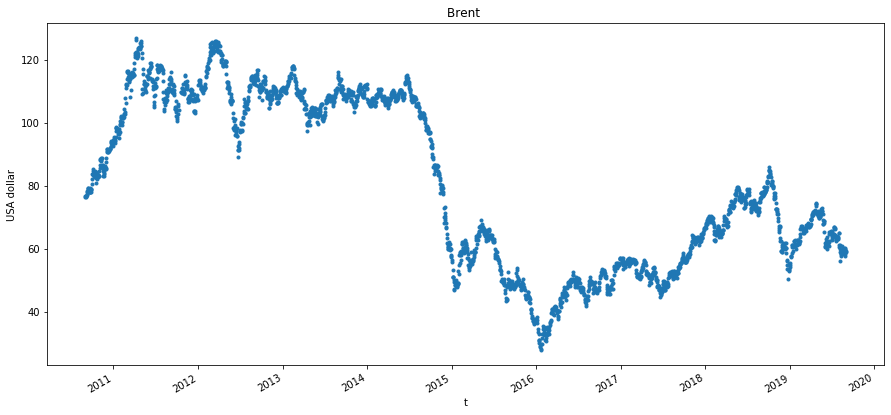

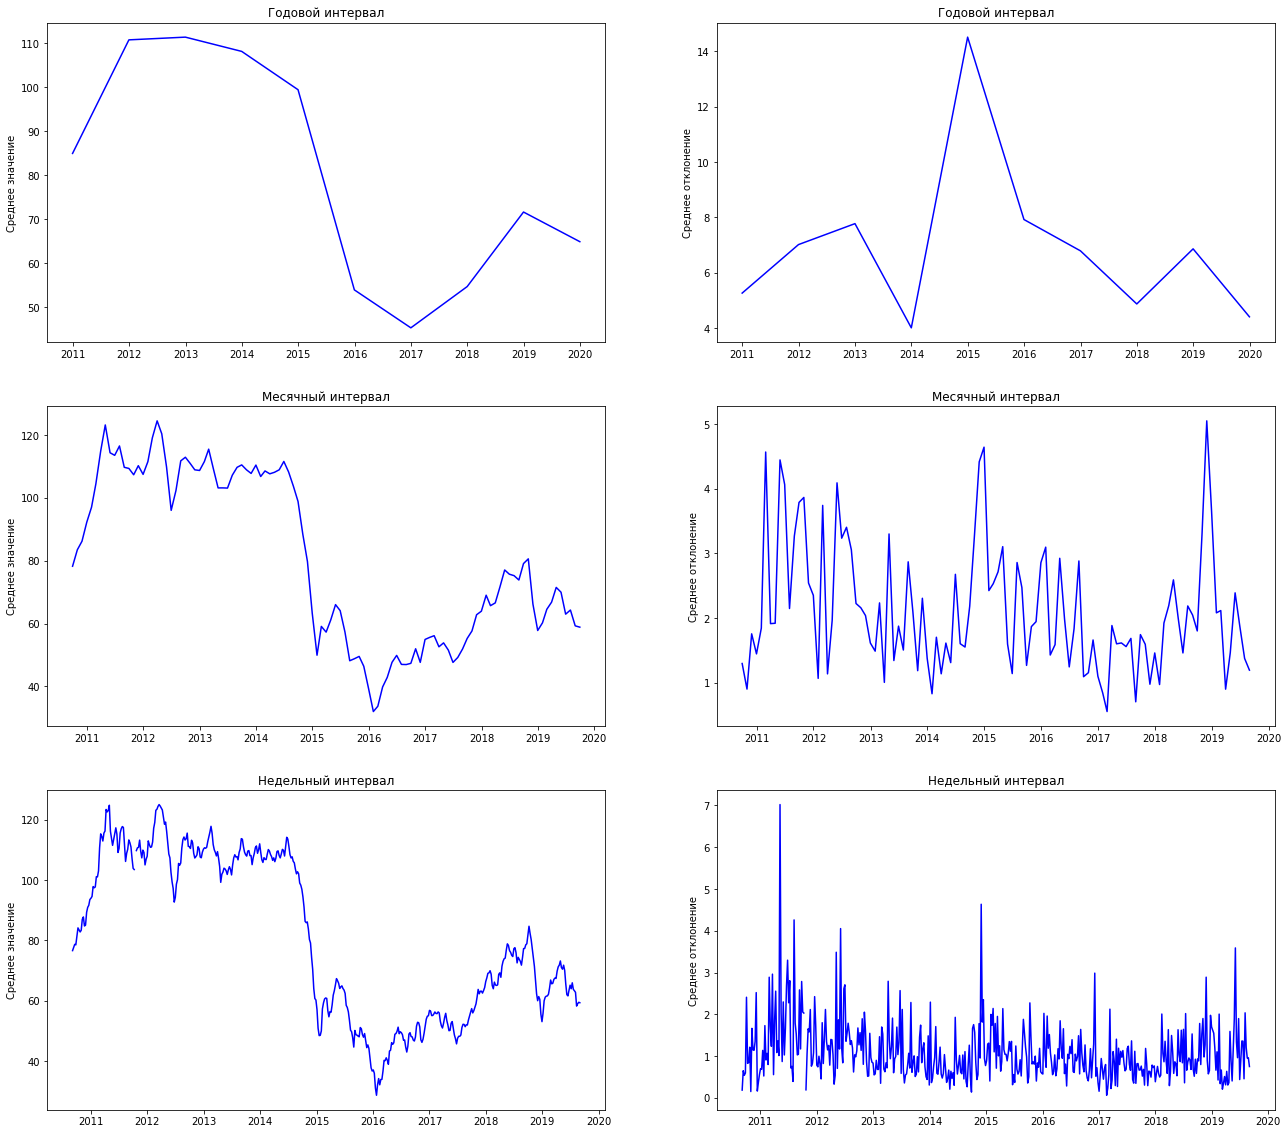

In [51]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

plt.figure(figsize=(22,20))

plt.subplot(3,2,5)
plt.plot(brent_data_week.index, brent_data_week['Среднее значение'].values, 'b')
plt.ylabel('Среднее значение')
plt.gca().set_title('Недельный интервал')

plt.subplot(3,2,6)
plt.plot(brent_data_week.index, brent_data_week['Среднее отклонение'].values, 'b')
plt.ylabel('Среднее отклонение')
plt.gca().set_title('Недельный интервал')

plt.subplot(3,2,3)
plt.plot(brent_data_month.index, brent_data_month['Среднее значение'].values, 'b')
plt.ylabel('Среднее значение')
plt.gca().set_title('Месячный интервал')

plt.subplot(3,2,4)
plt.plot(brent_data_month.index, brent_data_month['Среднее отклонение'].values, 'b')
plt.ylabel('Среднее отклонение')
plt.gca().set_title('Месячный интервал')

plt.subplot(3,2,1)
plt.plot(brent_data_year.index, brent_data_year['Среднее значение'].values, 'b')
plt.ylabel('Среднее значение')
plt.gca().set_title('Годовой интервал')

plt.subplot(3,2,2)
plt.plot(brent_data_year.index, brent_data_year['Среднее отклонение'].values, 'b')
plt.ylabel('Среднее отклонение')
plt.gca().set_title('Годовой интервал')

plt.show()

Из графиков видно, что среднее значение в общем повторяет ежедневный график на всех интервалах. По среднему отклонению на недельном интервале видим сильный выброс в середине 2011 года, в остальном среднее отклонение на недельном и месячном интервале выглядит похоже. На годовом интервале мы видим сильный выброс значения среднего отклонения в 2015 году, по сравнению с 2014 (сильное изменение стоимости нефти за этот год относительно обычного)